In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imdb_df = pd.read_csv('imdb_top_1000.csv')
imdb_df.columns = imdb_df.columns.str.lower()

In [3]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### 1. Checking data consistency and integrity


In [4]:
# Dataset information
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster_link    1000 non-null   object 
 1   series_title   1000 non-null   object 
 2   released_year  1000 non-null   object 
 3   certificate    899 non-null    object 
 4   runtime        1000 non-null   object 
 5   genre          1000 non-null   object 
 6   imdb_rating    1000 non-null   float64
 7   overview       1000 non-null   object 
 8   meta_score     843 non-null    float64
 9   director       1000 non-null   object 
 10  star1          1000 non-null   object 
 11  star2          1000 non-null   object 
 12  star3          1000 non-null   object 
 13  star4          1000 non-null   object 
 14  no_of_votes    1000 non-null   int64  
 15  gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
# Checking which columns have null data and how many rows of each column have null data
imdb_df.isnull().sum()

poster_link        0
series_title       0
released_year      0
certificate      101
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score       157
director           0
star1              0
star2              0
star3              0
star4              0
no_of_votes        0
gross            169
dtype: int64

In [6]:
imdb_df_not_duplicated = imdb_df.drop_duplicates()

In [7]:
print("Dataset shape:", imdb_df.shape)
print("Dataset size:", len(imdb_df))
print("Dataset without duplcates:", len(imdb_df))

Dataset shape: (1000, 16)
Dataset size: 1000
Dataset without duplcates: 1000


### 2. Data preprocessing

In [8]:
# Unique certificae values
imdb_df['certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [9]:
# Filling  null values
imdb_df['certificate'] = imdb_df['certificate'].fillna('Not rated')
imdb_df['meta_score'].fillna(imdb_df['meta_score'].mean(), inplace=True)

In [10]:
# Converting the gross field to a numeric value and filling gross null values
imdb_df['gross'] = imdb_df['gross'].apply(lambda x: float(x.replace(',', '')) if pd.notnull(x) else x)
imdb_df['gross'].fillna(imdb_df['gross'].median(), inplace=True)

In [11]:
# Checking movies that have words in place of the release year
imdb_df[~imdb_df['released_year'].str.isnumeric()]

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [12]:
# Adjusting the value of the only film that has the certificate in place of the year of release, this information was taken from Wikipedia
imdb_df['released_year'] = imdb_df['released_year'].replace('PG', '1995').astype(int)

In [13]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [14]:
print("Unique runtime values size:", len(imdb_df['runtime'].unique()))
print('Number of unique runtimes that have "minute" as the time unit:', 
      len(imdb_df[imdb_df['runtime'].str.endswith('min')]['runtime'].unique()))


Unique runtime values size: 140
Number of unique runtimes that have "minute" as the time unit: 140


In [15]:
# Transforming the runtime column to a numeric value
imdb_df['runtime'] = imdb_df['runtime'].str.split(' ').str[0].astype(int)
imdb_df.rename(columns={'runtime': 'runtime_minutes'}, inplace=True)

In [16]:
imdb_df.head()

,poster_link,series_title,released_year,certificate,runtime_minutes,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


###  3. Exploratory Data Analysis (EDA)

In [17]:
#Data describe
imdb_df.describe()

,released_year,runtime_minutes,imdb_rating,meta_score,no_of_votes,gross
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,77.97153,2.736929e+05,6.051360e+07
std,23.285669,28.093671,0.275491,11.36206,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,77.97153,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.25000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.00000,2.343110e+06,9.366622e+08


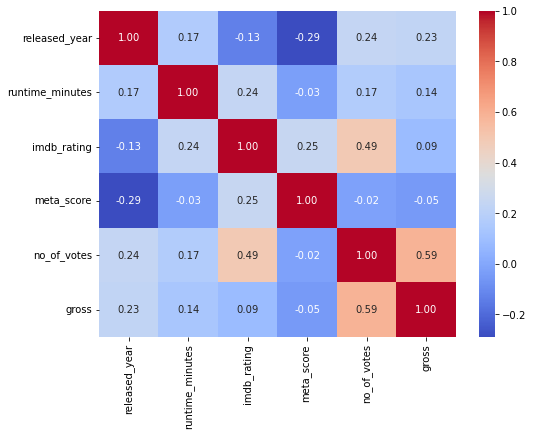

In [18]:
#Correlation Matrix
mat_corr = imdb_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=mat_corr, cmap="coolwarm", annot=True, fmt=".2f");


- **released_year and meta_score:** There is a weak, negative correlation (-0.29), indicating that more recent movies tend to have lower Metascores.

- **released_year and no_of_votes:** There is a weak, positive correlation (0.24), suggesting that newer movies tend to receive more votes.

- **released_year and gross:** There is a weak, positive correlation (0.23), suggesting that newer films tend to generate slightly higher revenue.

- **runtime_minutes and imdb_rating:** There is a weak, positive correlation (0.24), indicating that films with a longer duration tend to have a slightly higher rating on IMDb.

- **imdb_rating and no_of_votes:** There is a moderate, positive correlation (0.49), indicating that films with more votes tend to have higher ratings on IMDb.

- **imdb_rating and meta_score:** There is a weak, positive correlation (0.25), suggesting that movies with a higher IMDb rating also tend to have a slightly higher Metascore.

- **no_of_votes and gross:** There is a moderate, positive correlation (0.59), indicating that films with a higher number of votes tend to generate higher revenue.


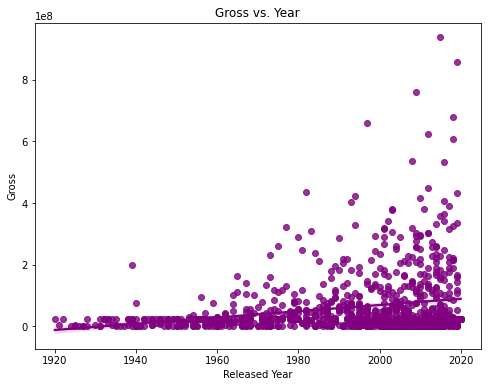

In [19]:
#Gross vs Release_date
plt.figure(figsize=(8, 6))
sns.regplot(data=imdb_df, x='released_year', y='gross', color='purple')
plt.title('Gross vs. Year')
plt.ylabel('Gross')
plt.xlabel('Released Year');

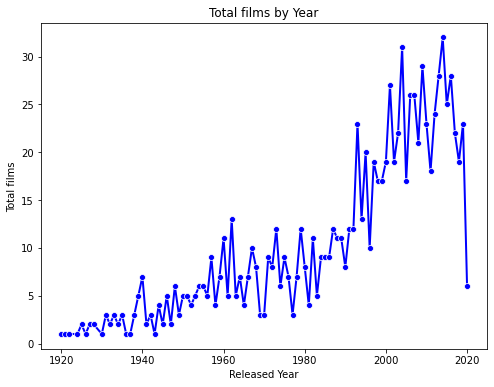

In [20]:
#Total films by Release date 

films_by_year = imdb_df.groupby('released_year', as_index=False)['series_title'].count()
plt.figure(figsize=(8, 6))
sns.lineplot(data=films_by_year, x='released_year', y='series_title', color='blue', marker='o', linewidth=2)
plt.title('Total films by Year')
plt.ylabel('Total films')
plt.xlabel('Released Year');

In [21]:
#Top 10 highest grossing films
top_films = imdb_df[['series_title', 'gross']].sort_values(by='gross', ascending=False).head(10)
top_films['gross'] = top_films['gross'].astype(int)
top_films

,series_title,gross
477,Star Wars: Episode VII - The Force Awakens,936662225
59,Avengers: Endgame,858373000
623,Avatar,760507625
60,Avengers: Infinity War,678815482
652,Titanic,659325379
357,The Avengers,623279547
891,Incredibles 2,608581744
2,The Dark Knight,534858444
582,Rogue One,532177324
63,The Dark Knight Rises,448139099


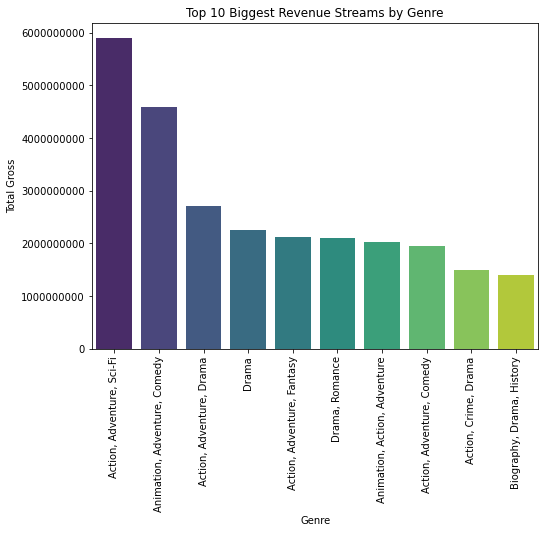

In [22]:
# Top 10 Biggest Revenue Streams by Genre
genre_revenue = (
    imdb_df.groupby('genre', as_index=False)['gross']
    .sum()
    .sort_values(by='gross', ascending=False)
    .head(10)
)

genre_revenue.rename(columns={'gross': 'total_gross'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='total_gross', data=genre_revenue, palette='viridis')

plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.title('Top 10 Biggest Revenue Streams by Genre')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 

plt.show()


In [23]:
def runtime_category(runtime):
    if runtime <= 90:
        return 'Short'
    elif runtime <=120:
        return 'Medium'
    else:
        return 'Long'
imdb_df['runtime_category'] = imdb_df['runtime_minutes'].apply(runtime_category)

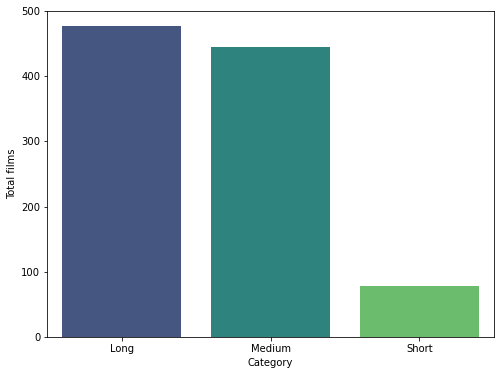

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=imdb_df, x='runtime_category', palette='viridis')
plt.xlabel('Category')
plt.ylabel('Total films');


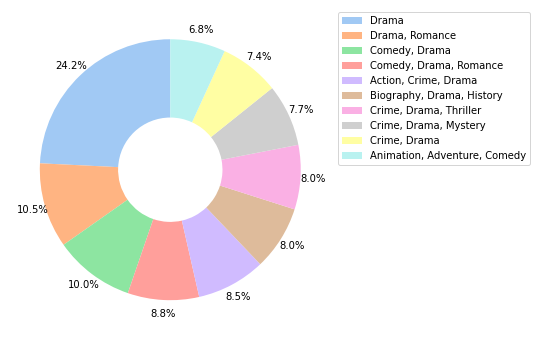

In [25]:
#Identifying the most common genres from the dataset

most_common_genres = imdb_df['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(most_common_genres.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, 
        colors=sns.color_palette('pastel'), wedgeprops={'width': 0.6})
plt.legend(labels=most_common_genres.index, loc='upper left', bbox_to_anchor=(1, 1));


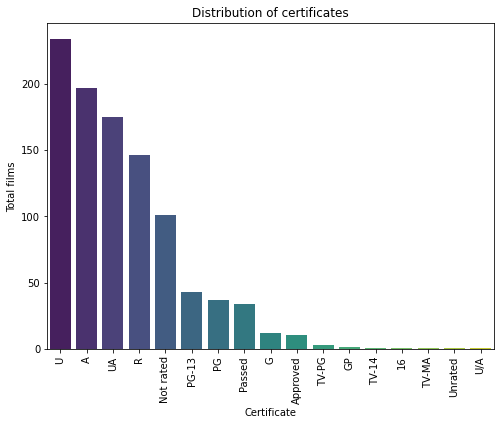

In [26]:
# Certificate distribuition
certificate_count = imdb_df['certificate'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=certificate_count, x='index', y='certificate',  palette='viridis')

plt.xlabel('Certificate')
plt.ylabel('Total films')
plt.title('Distribution of certificates')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 

plt.show()


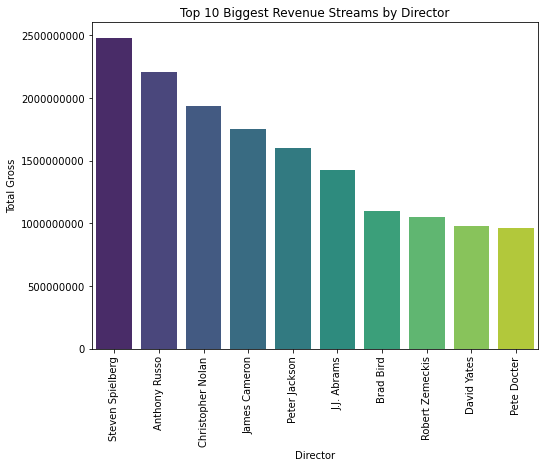

In [27]:
# Top 10 Biggest Revenue Streams by Director
director_revenue = (
    imdb_df.groupby('director', as_index=False)['gross']
    .sum()
    .sort_values(by='gross', ascending=False)
    .head(10)
)

director_revenue.rename(columns={'gross': 'total_gross'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='director', y='total_gross', data=director_revenue, palette='viridis')

plt.xlabel('Director')
plt.ylabel('Total Gross')
plt.title('Top 10 Biggest Revenue Streams by Director')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y') 

plt.show()


In [28]:
# Top 10 Biggest Revenue Streams by Director
director_rating = (
    imdb_df.groupby('director', as_index=False)['imdb_rating']
    .mean()
    .sort_values(by='imdb_rating', ascending=False)
    .head(10)
)

director_rating.rename(columns={'imdb_rating': 'mean_imdb_rating'}, inplace=True)

director_rating

,director,mean_imdb_rating
141,Frank Darabont,8.95
191,Irvin Kershner,8.70
284,Lana Wachowski,8.70
158,George Lucas,8.60
427,Roberto Benigni,8.60
316,Masaki Kobayashi,8.60
492,Thomas Kail,8.60
472,Sudha Kongara,8.60
135,Fernando Meirelles,8.60
428,Roger Allers,8.50


### 4.  Data preprocessing

#### 4.1 Data encoding

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
df = imdb_df.copy()

In [31]:
df.head()

,poster_link,series_title,released_year,certificate,runtime_minutes,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,runtime_category
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Long
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Long
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Long
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Long
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Medium


In [32]:
drop_cols = ['poster_link', 'runtime_minutes', 'overview']
df.drop(columns=drop_cols, axis=1, inplace=True)

In [33]:
df['stars'] = df.apply(lambda row: [row['star1'], row['star2'], 
                                    row['star3'], row['star4']], axis=1)
df['genres'] = df['genre'].str.split(',')

df_with_lists = df.drop(columns=['star1', 'star2', 'star3', 'star4', 'genre'])
print("Df size:", len(df))

Df size: 1000


In [34]:
df_with_lists.head()

,series_title,released_year,certificate,imdb_rating,meta_score,director,no_of_votes,gross,runtime_category,stars,genres
0,The Shawshank Redemption,1994,A,9.3,80.0,Frank Darabont,2343110,28341469.0,Long,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Drama]
1,The Godfather,1972,A,9.2,100.0,Francis Ford Coppola,1620367,134966411.0,Long,"[Marlon Brando, Al Pacino, James Caan, Diane K...","[Crime, Drama]"
2,The Dark Knight,2008,UA,9.0,84.0,Christopher Nolan,2303232,534858444.0,Long,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","[Action, Crime, Drama]"
3,The Godfather: Part II,1974,A,9.0,90.0,Francis Ford Coppola,1129952,57300000.0,Long,"[Al Pacino, Robert De Niro, Robert Duvall, Dia...","[Crime, Drama]"
4,12 Angry Men,1957,U,9.0,96.0,Sidney Lumet,689845,4360000.0,Medium,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John...","[Crime, Drama]"


In [35]:
df_exploded = df_with_lists.explode('genres').explode('stars').reset_index(drop=True)

In [36]:
print("Df exploded size:", len(df_exploded))
df_exploded.head()

Df exploded size: 10164


,series_title,released_year,certificate,imdb_rating,meta_score,director,no_of_votes,gross,runtime_category,stars,genres
0,The Shawshank Redemption,1994,A,9.3,80.0,Frank Darabont,2343110,28341469.0,Long,Tim Robbins,Drama
1,The Shawshank Redemption,1994,A,9.3,80.0,Frank Darabont,2343110,28341469.0,Long,Morgan Freeman,Drama
2,The Shawshank Redemption,1994,A,9.3,80.0,Frank Darabont,2343110,28341469.0,Long,Bob Gunton,Drama
3,The Shawshank Redemption,1994,A,9.3,80.0,Frank Darabont,2343110,28341469.0,Long,William Sadler,Drama
4,The Godfather,1972,A,9.2,100.0,Francis Ford Coppola,1620367,134966411.0,Long,Marlon Brando,Crime


In [37]:
encode_cols = ['certificate', 'director', 'runtime_category', 'stars', 'genres']
agroup_cols = list(df_exploded.select_dtypes(exclude='object').columns)
agroup_cols.append('series_title')

encoder = OneHotEncoder(sparse_output=False)

encoded_df = pd.DataFrame(encoder.fit_transform(df_exploded[encode_cols]))

encoded_cols_names = encoder.get_feature_names_out()
encoded_df.columns = encoded_cols_names

df_encoded = pd.concat([df_exploded[agroup_cols], encoded_df], axis=1)

In [38]:
encoded_df_max = df_encoded.groupby(agroup_cols, as_index=False)[encoded_cols_names].max()

In [39]:
row = encoded_df_max[encoded_df_max['series_title']=='The Godfather']
row[row.loc[:, row.eq(1).any()].columns]

,certificate_A,director_Francis Ford Coppola,runtime_category_Long,stars_Al Pacino,stars_Diane Keaton,stars_James Caan,stars_Marlon Brando,genres_ Drama,genres_Crime
218,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 4.2 Data scaling

In [40]:
try:
    agroup_cols.remove('series_title')
    agroup_cols.remove('imdb_rating')
except:
    pass

In [41]:
scaled_df = encoded_df_max.copy()
scaler = StandardScaler()

scaled_df[agroup_cols] = scaler.fit_transform(scaled_df[agroup_cols])

In [42]:
scaled_df.head()

,released_year,imdb_rating,meta_score,no_of_votes,gross,series_title,certificate_16,certificate_A,certificate_Approved,certificate_G,...,genres_Comedy,genres_Crime,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Horror,genres_Mystery,genres_Thriller,genres_Western
0,-3.060107,8.1,0.000000,-0.660938,-0.364834,Das Cabinet des Dr. Caligari,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-3.017141,8.3,0.000000,-0.490142,-0.543203,The Kid,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.974174,7.9,0.000000,-0.565079,-0.364834,Nosferatu,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-2.888242,8.2,0.000000,-0.708134,-0.587325,Sherlock Jr.,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.845275,8.0,1.675576,-0.674306,-0.596464,Bronenosets Potemkin,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
final_df = scaled_df.drop('series_title', axis=1)

In [44]:
final_df.head()

,released_year,imdb_rating,meta_score,no_of_votes,gross,certificate_16,certificate_A,certificate_Approved,certificate_G,certificate_GP,...,genres_Comedy,genres_Crime,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Horror,genres_Mystery,genres_Thriller,genres_Western
0,-3.060107,8.1,0.000000,-0.660938,-0.364834,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-3.017141,8.3,0.000000,-0.490142,-0.543203,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.974174,7.9,0.000000,-0.565079,-0.364834,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-2.888242,8.2,0.000000,-0.708134,-0.587325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.845275,8.0,1.675576,-0.674306,-0.596464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Training regression models


In [45]:
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [46]:
X = final_df.drop(['imdb_rating'], axis=1)
y = final_df['imdb_rating']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [48]:
X_train.head()

,released_year,meta_score,no_of_votes,gross,certificate_16,certificate_A,certificate_Approved,certificate_G,certificate_GP,certificate_Not rated,...,genres_Comedy,genres_Crime,genres_Drama,genres_Family,genres_Fantasy,genres_Film-Noir,genres_Horror,genres_Mystery,genres_Thriller,genres_Western
29,-2.286713,1.675576,-0.692273,-0.557694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,0.420168,-2.198899,-0.091574,-0.089888,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695,0.677966,1.235294,-0.520795,-0.537875,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.420168,-0.525831,1.757981,1.087407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,0.935764,1.059182,0.816234,-0.344736,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
models = {
    "XGBRegressor": XGBRegressor(),
    "Lasso": Lasso()
}

In [50]:
param_grids = {
    "XGBRegressor": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1, 10],
        'max_iter': [1000, 5000]
    }
}

In [51]:
best_params = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, 
                               scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[model_name] = grid_search.best_params_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = round(r2_score(y_test, y_pred), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    
    print(f"Metrics for {model_name} with best parameters:")
    print(f"  R²: {r2}")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print("-" * 30)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Metrics for XGBRegressor with best parameters:
  R²: 0.54
  MAE: 0.15
  MSE: 0.04
  RMSE: 0.2
------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Lasso: {'alpha': 0.01, 'max_iter': 1000}
Metrics for Lasso with best parameters:
  R²: 0.43
  MAE: 0.17
  MSE: 0.04
  RMSE: 0.2
------------------------------
